### Open File

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [114]:
df = pd.read_csv('./data/df_features.gz')

### Select bad Reviews

In [115]:
df['Bad'] = [1 if i < 7 else 0 for i in df.Reviewer_Score]

In [116]:
df_bad = df[df.Bad==1]

In [118]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'Diff', 'Diff_Percentage',
       'Review_Month', 'Review_Year', 'Country', 'City', 'Pet', 'Purpose',
       'Whom', 'Room', 'Length', 'Device', 'Room_Recode', 'Nationality_Recode',
       'Length_Recode', 'Close_Landmarks', 'Dist_Center', 'Dist_Airport',
       'Dist_Train', 'Price', 'Stars', 'Length_N', 'Reservation_ADR',
       'food_Neg', 'staff_Neg', 'location_Neg', 'value_Neg', 'comfort_Neg',
       'room_Neg', 'facilities_Neg', 'cleanliness_Neg', 'food_Pos',
       'staff_Pos', 'location_Pos', 'value_Pos', 'comfort_Pos', 'room_Pos',
       'facilities_Pos', 'cleanliness_Pos', 'food_Neg_Hotel',
       'staff_Neg_Hotel', 'loca

In [178]:
vars = ['Purpose','Room_Recode','Length_Recode','Pet','City']
df_pos = None

for i in vars:
    tmp = df_bad[[i,'food_Neg', 'staff_Neg', 'location_Neg', 'value_Neg', 'comfort_Neg',
                      'room_Neg', 'facilities_Neg', 'cleanliness_Neg']].groupby([i]).sum()
    #tmp.rename(columns={tmp.columns[0]: "Variable" }, inplace = True)
    df_pos = pd.concat([df_pos, tmp])

In [179]:
df_pos.shape

(23, 8)

In [180]:
df_pos

,food_Neg,staff_Neg,location_Neg,value_Neg,comfort_Neg,room_Neg,facilities_Neg,cleanliness_Neg
Business trip,4516,6051,3968,3664,9001,5320,7505,2724
Leisure trip,15625,21803,14571,13128,27515,20039,24241,9576
Deluxe,5724,8270,5352,5054,10268,7014,8649,3387
Executive,967,1308,816,770,1541,1103,1377,548
Other (Standard),13428,18143,12261,10977,24954,17343,21745,8372
Studio,157,251,145,124,251,201,244,135
Suite,571,882,565,453,752,609,820,351
Stayed 1 night,7714,10495,6909,6545,14372,10173,12342,4273
Stayed 2 nights,5462,7528,5144,4644,10121,6855,8672,3274
Stayed 3 nights,3792,5208,3603,3095,6546,4555,5814,2447


In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coordenadas = pca.fit_transform(df_pos)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.99816589 0.00132309]


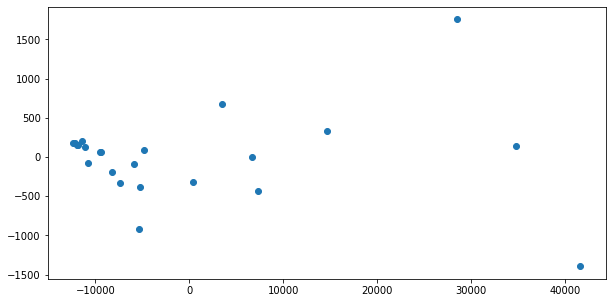

In [182]:
plt.figure(figsize=(10,5))
plt.scatter(coordenadas[:,0], coordenadas[:,1])

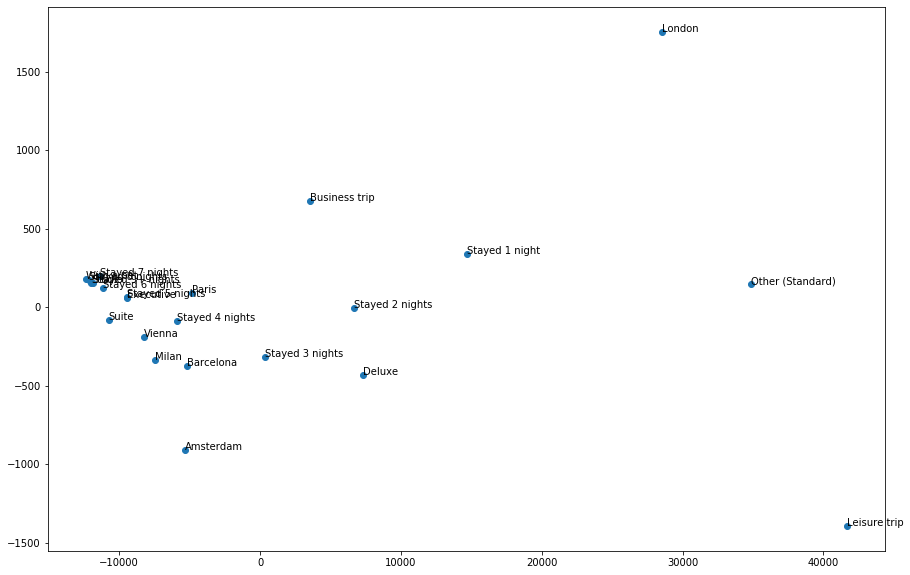

In [183]:
x = coordenadas[:,0]
y = coordenadas[:,1]
n = df_pos.index

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

In [151]:
coordenadas[:,0]

(52,)

In [127]:
variables = ['food_Neg', 'staff_Neg','location_Neg', 'value_Neg', 'comfort_Neg','room_Neg', 
             'facilities_Neg', 'cleanliness_Neg']
df_pca = df[variables]

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coordenadas = pca.fit_transform(df_pca)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.26429301 0.15781213]


In [134]:
coordenadas.shape

(515738, 2)

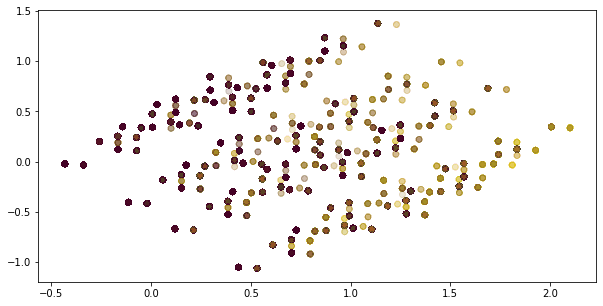

In [139]:
plt.figure(figsize=(10,5))
plt.scatter(coordenadas[:,0], coordenadas[:,1], c=df.Bad, alpha=0.01)